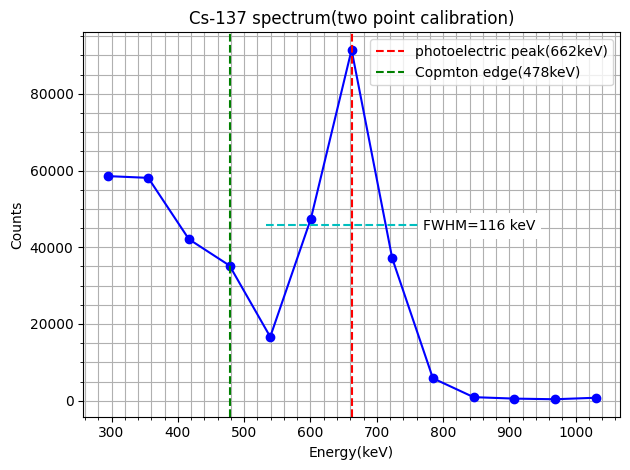

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

data = np.genfromtxt('exp7_data.csv',delimiter=',')

comp_edge = 478
photo_peak = 662

channel = data[:,0]
counts = data[:,1]

# E calibration
def calib(x):
    a = (photo_peak-comp_edge)/(14-8)
    return a*x+ photo_peak- a*14

energies = calib(channel)

# calculating the FWHM
half_max = counts.max()/2
peak_id = np.argmax(counts)

left_id = peak_id
while left_id > 0 and counts[left_id] > half_max :
    left_id-=1
    
right_id = peak_id
while right_id < len(counts) and counts[right_id] > half_max :
    right_id+=1
    

def interp_x(x1, y1, x2, y2, y):
    return x1 + (y - y1) * (x2 - x1) / (y2 - y1)

# Left energy at half max
left_energy = interp_x(
    energies[left_id], counts[left_id], energies[left_id + 1], counts[left_id + 1], half_max
)

# Right energy at half max
right_energy = interp_x(
    energies[right_id - 1], counts[right_id - 1], energies[right_id], counts[right_id], half_max
)

# Calculate FWHM
fwhm = right_energy - left_energy

plt.plot(energies, counts, marker='o',linestyle='-',color='b')
plt.title('Cs-137 spectrum(two point calibration)')
plt.axvline(662,0,1.,linestyle='--',color='r',label='photoelectric peak(662keV)')
plt.axvline(478,0,1,linestyle='--',color='g',label='Copmton edge(478keV)')
plt.axhline(counts.max()/2,0.34,0.66,linestyle='--',color='c')
plt.text(770,44500,r'FWHM=%d keV' % fwhm, bbox={'facecolor':'white','ec':'none'})
plt.xlabel('Energy(keV)')
plt.ylabel('Counts')
plt.minorticks_on()
plt.grid(True,which='both')
plt.legend()
plt.tight_layout()
plt.savefig('exp7_plot.jpg',dpi=500)
plt.show()